# Task 1 (3 points)

Generate a toy dataset for the "XOR" problem:

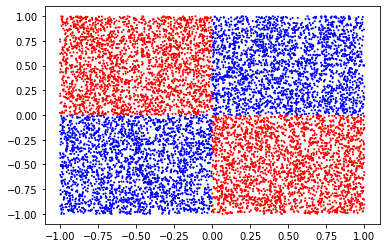

i.e. where the two features are distributed **uniformly** in $[-1, 1]$, and the target is $y = (x_0 >= 0) \text{ XOR } (x_1 >= 0)$.

Let the total number of points in the dataset be $N=10000$.

Fit a `sklearn.tree.DecisionTreeClassifier` on this data. Find a minimal `max_depth` value that results in train accuracy $>0.99$.

For each value of `max_depth` from 1 to the value found above, plot the data with the decision boundary for the obtained model. (*Hint: use `s=1` argument to `plt.scatter` to be able to see anything behind the data points.*)

For the model with train accuracy $>0.99$ use `sklearn.tree.plot_tree` to observe the tree structure.

In [1]:
import numpy as np

In [2]:
N = 10000

In [3]:
def gen_data(N):
  X = np.random.uniform(-1., 1., size=(N, 2))
  y = np.asarray([ 0 if bool(x0>=0) == bool(x1>=0) else 1 for x0,x1 in X])
  return X, y

In [4]:
X,y = gen_data(N)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [6]:
clf = DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

In [7]:
print (clf.get_depth())

4


In [8]:
y_pred = clf.predict(X)

In [9]:
accuracy_score(y, y_pred)

1.0

In [10]:
acc = 1
depth = clf.get_depth()
max_depth = 0
while (True):
  clf = DecisionTreeClassifier(max_depth = depth)
  clf.fit(X,y)
  y_pred = clf.predict(X)
  acc = accuracy_score(y, y_pred)
  print ("accuracy score for " + str(depth) + " is " + str(acc))
  if (acc > 0.99):
    max_depth = depth
    depth = depth -1
  else:
    break
print ("min depth " + str(max_depth))

accuracy score for 4 is 1.0
accuracy score for 3 is 0.9995
accuracy score for 2 is 0.7579
min depth 3


In [11]:
def plot_decision_surface(
                  clf, X, y,
                  nx=200, ny=100,
                  cmap='bwr',
                  alpha=0.6,
        ):
    """
    Plot the decision boundary of clf on X and y, visualize training points
    """
    
    # Define the grid
    x_top_left = X.min(axis=0) - 1
    x_bottom_right = X.max(axis=0) + 1
    grid_x0, grid_x1 = np.meshgrid(
         np.linspace(x_top_left[0], x_bottom_right[0], ny),
         np.linspace(x_top_left[1], x_bottom_right[1], nx)
      )
    
    # Calculate predictions on the grid
    y_pred_grid = clf.predict(
                        np.stack(
                              [
                                grid_x0.ravel(),
                                grid_x1.ravel()
                              ],
                              axis=1
                            )
                      ).reshape(grid_x1.shape)
    
    # Find optimal contour levels and make a filled
    # contour plot of predictions
    labels = np.sort(np.unique(y))
    labels = np.concatenate([[labels[0] - 1],
                             labels,
                             [labels[-1] + 1]])
    medians = (labels[1:] + labels[:-1]) / 2
    plt.contourf(grid_x0, grid_x1, y_pred_grid, cmap=cmap, alpha=alpha,
                 levels=medians)
    
    # Scatter data points on top of the plot,
    # with different styles for correct and wrong
    # predictions
    y_pred = clf.predict(X)
    plt.scatter(*X[y_pred==y].T, c=y[y_pred==y],
                marker='o', cmap=cmap, s=1, label='correct')
    plt.scatter(*X[y_pred!=y].T, c=y[y_pred!=y],
                marker='x', cmap=cmap, s=1, label='errors')

    # Dummy plot call to print the accuracy in the legend.
    plt.plot([], [], ' ',
             label='Accuracy = {:.3f}'.format(accuracy_score(y, y_pred)))
    
    plt.legend(loc='best')
    plt.title("decision boundary for tree with depth = " +  str (clf.get_depth()))
    plt.show()

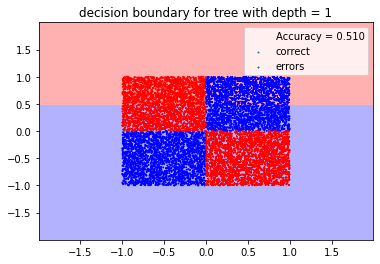

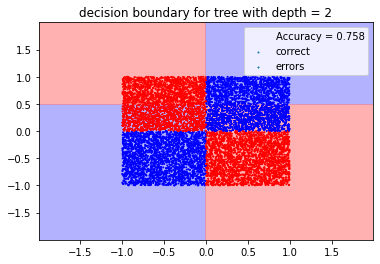

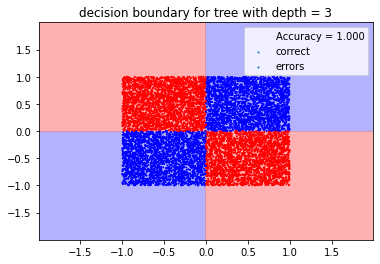

In [12]:
for i in range(1,max_depth+1):
  clf = DecisionTreeClassifier(max_depth = i)
  clf.fit(X,y)
  plot_decision_surface(clf ,X,y)


In [13]:
from sklearn import tree

3


[Text(0.5909090909090909, 0.875, 'X[1] <= 0.488\ngini = 0.5\nsamples = 10000\nvalue = [4972, 5028]'),
 Text(0.36363636363636365, 0.625, 'X[0] <= 0.001\ngini = 0.5\nsamples = 7372\nvalue = [3724, 3648]'),
 Text(0.18181818181818182, 0.375, 'X[1] <= 0.0\ngini = 0.437\nsamples = 3683\nvalue = [2493, 1190]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.002\nsamples = 2492\nvalue = [2490, 2]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.005\nsamples = 1191\nvalue = [3, 1188]'),
 Text(0.5454545454545454, 0.375, 'X[1] <= 0.0\ngini = 0.445\nsamples = 3689\nvalue = [1231, 2458]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.0\nsamples = 2458\nvalue = [0, 2458]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.0\nsamples = 1231\nvalue = [1231, 0]'),
 Text(0.8181818181818182, 0.625, 'X[0] <= -0.001\ngini = 0.499\nsamples = 2628\nvalue = [1248, 1380]'),
 Text(0.7272727272727273, 0.375, 'gini = 0.0\nsamples = 1380\nvalue = [0, 1380]'),
 Text(0.9090909090909091, 0.375, 'gini = 0.0\nsamples = 1248\nvalue 

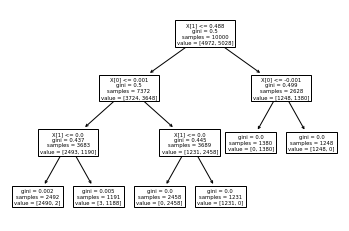

In [14]:
clf = DecisionTreeClassifier(max_depth = max_depth)
clf.fit(X,y)
print (clf.get_depth())
tree.plot_tree(clf)

# Task 2 (3 points)

Consider the following dataset:

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data.DESCR)

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target_names[data.target]

print(X.iloc[:5])
print(y[:5])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)
print(X_train.iloc[:5])
print(y_train[:5])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Build a `sklearn.tree.DecisionTreeClassifier` to maximize the test ROC AUC score.

When predicting cancer, it's much more dangerous to have a false negative prediction rather than false positive. Try to find the best tree (in terms of test ROC AUC) where the labels are re-weighted with the `class_weight={'malignant' : 2., 'benign' : 1.}` argument provided to the `DecisionTreeClassifier` constructor.

Plot test ROC curves for the two best models you found on the same plot.

### base model

In [31]:
clf = DecisionTreeClassifier(class_weight={'malignant' : 2., 'benign' : 1.})
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={'benign': 1.0, 'malignant': 2.0})

In [32]:
pred = clf.predict(X_test)

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

In [34]:
pred_numerical = [ 0 if x == "benign" else 1 for x in pred ]
y_test_numerical = [ 0 if x == "benign" else 1 for x in y_test ]

In [35]:
print("ROC_AUC score =", roc_auc_score(pred_numerical, y_test_numerical))

ROC_AUC score = 0.874439004487964


In [36]:
clf.get_depth()

6

In [37]:
depths = [1, 2, 3, 4,5,6]
min_samples_leafs = [1, 2, 3, 4, 6, 8, 10, 16, 20, 32]

In [38]:
output = { 
    "First": { "max_depth": 0 , "min_samples_leaf": 0  , "score" : 0},
    "Second": { "max_depth": 0 , "min_samples_leaf": 0  , "score" : 0}
}

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [40]:

y_test_numerical = [ 0 if x == "benign" else 1 for x in y_test ]
for depth in depths:
  for min_samples_leaf in min_samples_leafs:
    tmp_clf =  make_pipeline(
        StandardScaler(),
        DecisionTreeClassifier(max_depth = depth ,min_samples_leaf = min_samples_leaf   , class_weight={'malignant' : 2., 'benign' : 1.})
        )
    tmp_clf.fit(X_train,y_train)
    pred = tmp_clf.predict(X_test)
    pred_numerical = [ 0 if x == "benign" else 1 for x in pred ]
    score  = roc_auc_score(pred_numerical, y_test_numerical)
    if score >= output["First"]["score"]:
      output["First"]["score"] = score
      output["First"]["max_depth"] = depth
      output["First"]["min_samples_leaf"] = min_samples_leaf
    elif score >= output["Second"]["score"]:
      output["Second"]["score"] = score
      output["Second"]["max_depth"] = depth
      output["Second"]["min_samples_leaf"] = min_samples_leaf



In [41]:
print ("first best has a depth of " + str(output["First"]["max_depth"]) + " and a min_samples_leaf of " + str(output["First"]["min_samples_leaf"]) + " and AUC/ROC equal to " + str(output["First"]["score"]) )
print ("Second best has a depth of " + str(output["Second"]["max_depth"]) + " and a min_samples_leaf of " + str(output["Second"]["min_samples_leaf"]) + " and AUC/ROC equal to " + str(output["Second"]["score"]) )

first best has a depth of 6 and a min_samples_leaf of 6 and AUC/ROC equal to 0.9238064791133844
Second best has a depth of 6 and a min_samples_leaf of 1 and AUC/ROC equal to 0.9045454545454545


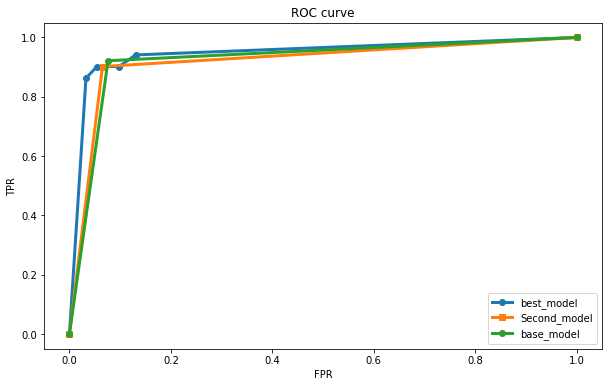

In [84]:
model1 = make_pipeline(
        StandardScaler(),
        DecisionTreeClassifier(max_depth = output["First"]["max_depth"] ,min_samples_leaf = output["First"]["min_samples_leaf"]  , class_weight={'malignant' : 2., 'benign' : 1.})
        )
model1.fit(X_train, y_train)
#predictions1 = model1.predict(X_test)
predictions1 = model1.predict_proba(X_test)
#pred_numerical1 = [ 0 if x == "benign" else 1 for x in predictions1 ]
#fpr1, tpr1, _ = roc_curve(y_test_numerical, pred_numerical1)
fpr1, tpr1, _ = roc_curve(y_test_numerical, predictions1[:,1])

model2 = make_pipeline(
        StandardScaler(),
        DecisionTreeClassifier(max_depth = output["Second"]["max_depth"] ,min_samples_leaf = output["Second"]["min_samples_leaf"]  , class_weight={'malignant' : 2., 'benign' : 1.})
        )
model2.fit(X_train, y_train)
#predictions2 = model2.predict(X_test)
predictions2 = model2.predict_proba(X_test)
#pred_numerical2 = [ 0 if x == "benign" else 1 for x in predictions2 ]
#fpr2, tpr2, _ = roc_curve(y_test_numerical, pred_numerical2)
fpr2, tpr2, _ = roc_curve(y_test_numerical, predictions2[:,1])

model3 = DecisionTreeClassifier(class_weight={'malignant' : 2., 'benign' : 1.})
        
model3.fit(X_train, y_train)
#predictions3 = model3.predict(X_test)
predictions3 = model3.predict_proba(X_test)
#pred_numerical3 = [ 0 if x == "benign" else 1 for x in predictions3 ]
#fpr3, tpr3, _ = roc_curve(y_test_numerical, pred_numerical3)
fpr3, tpr3, _ = roc_curve(y_test_numerical, predictions3[:,1])

plt.figure(figsize=(10, 6))
#plt.clf()
plt.plot(fpr1, tpr1,'o-', linewidth=3, label='best_model')
plt.plot(fpr2, tpr2,'s-', linewidth=3, label='Second_model')
plt.plot(fpr3, tpr3,'o-',linewidth=3, label='base_model')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend(loc='best')
#plt.ylim(0.8, 1)
plt.show()

### my attempt to do the same as above but with GridSearchCV

In [65]:
#dt = DecisionTreeClassifier(random_state = 42)

In [66]:
#parameters = {"max_depth":[1, 2, 3, 6, 8, 10],  
#              "min_samples_leaf": [1, 2, 3, 4, 6, 8, 10, 16, 20, 32] }

In [67]:
#gc = GridSearchCV(dt, parameters, n_jobs= 1,scoring='roc_auc')

In [68]:
#gc.fit(X, y)

In [69]:
#import pandas as pd

In [70]:
#print(gc.best_params_)

In [71]:
#results = pd.DataFrame(gc.cv_results_)
#results.sort_values(by='rank_test_score', inplace=True)
#results = results.reset_index(drop=True)

In [72]:
# with pd.option_context('display.max_rows', None,
#                        'display.max_columns', None,
#                        'display.precision', 3,
#                        ):
#     print(results)

In [73]:
# params_1st_best =results.sort_values(by='rank_test_score').loc[0, 'params']
# params_2nd_best = results.sort_values(by='rank_test_score').loc[6, 'params']
# print (params_1st_best)
# print (params_2nd_best)

In [74]:
# clf1 = make_pipeline(
#     StandardScaler(),
#     DecisionTreeClassifier(max_depth = params_1st_best['max_depth'] ,min_samples_leaf = params_1st_best['min_samples_leaf']   , class_weight={'malignant' : 2., 'benign' : 1.})
# )
# clf1.fit(X_train,y_train)

In [75]:
# clf1 = DecisionTreeClassifier(max_depth = params_1st_best['max_depth'] ,min_samples_leaf = params_1st_best['min_samples_leaf'] , class_weight={'malignant' : 2., 'benign' : 1.})
# clf1.fit(X_train,y_train)

In [76]:
# pred1 = clf1.predict(X_test)

In [77]:
# pred_numerical1 = [ 0 if x == "benign" else 1 for x in pred1 ]
# y_test_numerical = [ 0 if x == "benign" else 1 for x in y_test ]

In [78]:
# print("ROC_AUC score =", roc_auc_score(pred_numerical1, y_test_numerical)*100, "%")

In [79]:
# clf2 = make_pipeline(
#     StandardScaler(),
#     DecisionTreeClassifier(max_depth = params_2nd_best['max_depth'] ,min_samples_leaf = params_2nd_best['min_samples_leaf']   , class_weight={'malignant' : 2., 'benign' : 1.})
# )
# clf2.fit(X_train,y_train)

In [80]:
# clf2 = DecisionTreeClassifier(max_depth = params_2nd_best['max_depth'] ,min_samples_leaf = params_1st_best['min_samples_leaf'] , class_weight={'malignant' : 2., 'benign' : 1.})
# clf2.fit(X_train,y_train)

In [81]:
# pred2 = clf2.predict(X_test)

In [82]:
# pred_numerical2 = [ 0 if x == "benign" else 1 for x in pred2 ]

In [83]:
# print("ROC_AUC score =", roc_auc_score(pred_numerical2, y_test_numerical)*100, "%")